# Overview 

The data gathered for this machine learning model consists of many different attributes to predict a student's performance grade. 
The final performance grade can be referred to as the target. 
Some of these features are age, sex, family size, past grades, absences, and internet access. To briefly introduce the problem, the model is being 
created to identify students who may need additional assistance and interventions to improve their course performance. To approch this issue a regression model will be applied.

# Problem Framing & Big Picture

## Problem & Objective

As mentioned in the overview and the notes provided by the school director, some students 
in the Portuguese school system are experiencing issues with academic performance. 
Creating a machine learning model to address this issue will provide a solution 
for identifying students who may need additional assistance and interventions to imporve their grade performance.

## Framing Problem

Before creating a machine learning model, the data must be structured in a specific way to address the objective. 
For this task, the provided data includes meaningful labels, indicating a supervised learning task. 
Additionally, since the data is static and not continuously updated, this task will be conducted offline, without incremental training of the model. 
In other words, the data is not streamed in real-time, so the model does not need to adapt continuously.

## Machine Learning Task

For this machine learning task, the data will be tailored specifically for a regression model rather than a classification model. 
Although a classification model could also be applied, using a regression model will provide actual numerical output predictions instead of categorical outcomes such as pass or fail.
As mentioned in the overview, the objective is to identify students who may need additional assistance and interventions to improve their course performance. 
By having outputs of actual values rather than a binary pass or fail, we can identify students within specific ranges, allowing for more analysis and targeted interventions. 
This approach enables us to assess how these students compare to their peers without categorizing them into binary outcomes, thereby providing a solution to the problem at hand and more.

## Measuring Performance

The metric used to measure the model's performance will be Root Mean Square Error (RMSE). When applied to regression models, 
RMSE provides insight into how well the model generalizes. RMSE is essentially the square root of another cost function, Mean Square Error (MSE). 
It quantifies the average magnitude of errors between predicted values and actual values.  In order to determine the model for best use
cross validation techniques will be applied to gather insights.

## Additional Information & Recap

As mentioned by the director the target feature is heavily correlated with the two prior performance grades. 
The data collected comes from two Portuguese schools. The objective of the model is to predict the final performance grades and 
identify students who may need additional assistance. 
This machine learning task will be approached as a supervised regression model and conducted offline.


**Regression Model Potiential Issues**

**Overfitting:**

- This occurs when the model generalizes too well on the training data but performs poorly on new unseen data. 
It happens when the model learns to capture noise in the training data rather than the underlying patterns. This can be mitigated by employing cross-validation, where the data is split into multiple training and validation sets to assess the model's performance across different folds.

**Underfitting:**
- The model is too simple to capture the underlying patterns in the data. 
It lacks complexity, making it difficult to learn from the training data and resulting in poor performance. 
This can be addressed by increasing the model's complexity, performing feature engineering, and/or applying regularization techniques.

**Missing Data:**
- The provided data may have missing information in some columns. 
This can be handled through data cleaning and imputation techniques.

**Outliers:**
- Outliers can skew the model parameter estimates, leading to biased results. 
Addressing outliers involves data cleaning and potentially using cross-validation to ensure the model's 
performance is robust and not unduly influenced by outliers.

# Get The Data

## Import Data

In [1]:
# Lib import
import pandas as pd
import numpy as np
import seaborn as sns

np.random.seed(42) # Setting seed for notebook 
                    # To ensure that this notebook's outputs remain the same 

In [2]:
# Student data provided by director
# CSV format 
student_data = pd.read_csv('student-mat.csv') # upload data, csv format

In [3]:
#Data Size and data types for each column
print("Data Size:", student_data.size) 
print("--------------------------------")
print(student_data.info()) 

Data Size: 13825
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  

## Data Features 

1. school - student's school ("GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex ("F" - female or "M" - male)
3. age - student's age (numeric from 15 to 22)
4. address - student's home address type ("U" - urban or "R" - rural)
5. famsize - family size ("LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status ("T" - living together or "A" - apart)
7. Medu - mother's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th
grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th
grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job ( "teacher", "health" care related, civil "services" (e.g. administrative
or police), "at_home" or "other")
10. Fjob - father's job ("teacher", "health" care related, civil "services" (e.g. administrative or
police), "at_home" or "other")
11. reason - reason to choose this school (close to "home", school "reputation", "course"
preference or "other")
12. guardian - student's guardian ("mother", "father" or "other")
13. traveltime - home to school travel time (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1
hour, or 4 - >1 hour)
14. studytime - weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10
hours)
15. failures - number of past class failures (n if 1<=n<3, else 4)
16. schoolsup - extra educational support (yes or no)
17. famsup - family educational support (yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (yes or no)
19. activities - extra-curricular activities (yes or no)
20. nursery - attended nursery school (yes or no)
21. higher - wants to take higher education (yes or no)
22. internet - Internet access at home (yes or no)
23. romantic - with a romantic relationship (yes or no)
24. famrel - quality of family relationships (from 1 - very bad to 5 - excellent)
25. freetime - free time after school (from 1 - very low to 5 - very high)
26. goout - going out with friends (from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (from 1 - very low to 5 - very high)
29. health - current health status (from 1 - very bad to 5 - very good)
30. absences_G1 - number of school absences for G1 term (numeric)
31. absences_G2 - number of school absences for G2 term (numeric)
32. absences_G3 - number of school absences for G3 term (numeric)
33. G1 - first term grade (numeric: from 0 to 20)
34. G2 - second term grade (numeric: from 0 to 20)

## Target

**G3:** `Final performance grade (numeric: from 0 to 20)`

## Test and Training Set

Splitting data into testing and training sets can sometimes result in an inaccurate representation of the population from which the data originates. 
This is particularly evident when the data is split without prior stratification, a practice known as random sampling, which can lead to imbalanced classes 
and introduce bias into the selected models.

In contrast, stratified sampling divides the population into distinct subgroups or strata and then randomly samples from each subgroup. 
This method ensures that each subgroup is proportionally represented in the final sample, effectively eliminating potential bias.

Moreover, the stratification below involves averaging the prior performance grades (excluding G3). 
This approach aims to establish a middle ground for both prior time periods and also proves beneficial for the target variable,
as both prior performance grades strongly correlate with the target.

Stratified Sampling inhances the following:
- Precision 
- Comparisons
- Efficiency

The series and bar chart below provides a view on the percentage and count of students that fall into their respective performance categories
based on their average grade across both performance periods.

In [4]:
# Creating column with average grade of each student from prior time periods.
# Note, G3 is excluded because G3 is the target
student_data['average_grade'] = student_data[['G1', 'G2']].mean(axis=1)

grade_cat
F     41.0
C     38.0
B     13.0
A      5.0
A+     3.0
Name: proportion, dtype: float64


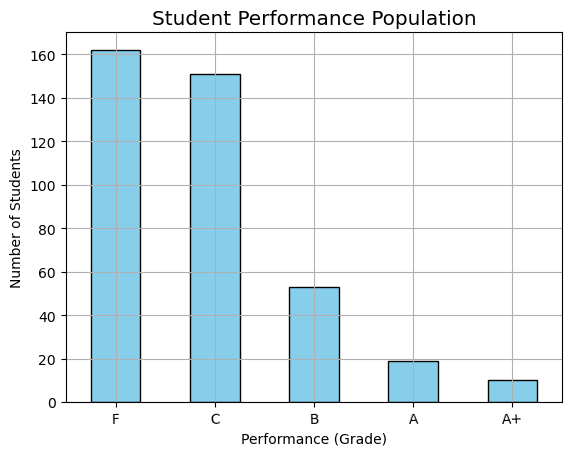

In [5]:
import matplotlib.pyplot as plt # Import lib for visual

# Bins/Strata for each grade 
grade_bins = [0.00, 9.99, 13.99, 15.99, 17.99, np.inf]

# Labels for each bin
grade_labels = ['F', 'C', 'B', 'A', 'A+']

# Creating grade category for each student that falls in their respected bins 
student_data['grade_cat'] = pd.cut(student_data['average_grade'],
                                   bins=grade_bins, labels=grade_labels)

# Proportion and percentage of students in each performance category.
print(student_data.grade_cat.value_counts(normalize=True).round(2) * 100)

# Visual representation of each group
student_data.grade_cat.value_counts().sort_index().plot.bar(rot=2, grid=True, color='skyblue', edgecolor='black')
plt.style.use('bmh')
plt.title("Student Performance Population")
plt.xlabel("Performance (Grade)")
plt.ylabel("Number of Students")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split 

X = student_data.drop(columns="G3") # Features 
y = student_data.G3 # Target

# Split data into training and testing sets (80% training, 20% testing, setting random state to 42)
# The data is stratisfied by average grade. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=student_data["grade_cat"], random_state=42)

# Remove average grade and grade cat columns. These columns are no longer needed for the datasets.
# Columns were used to prep and split data into training and test sets by strata
# Note: This is a regression model, no need to keep grade cat column
for set_ in (X_train, X_test):
    set_.drop(["average_grade","grade_cat"], axis=1, inplace=True)

# Explore the Data

## Training Set Attributes

**Numerical Features**

Below is a preview of some basic summary statistics pertaining to the numerical features in the dataset. As shown, the average performance grade is 10, which corresponds to a C average performance grade. This gives an initial idea of what future performance grades on average may be moving forward. As mentioned earlier, performance grades 1 and 2 are heavily correlated with the target.

Additionally, the low standard deviation provides an idea of the distribution and how its spread, indicating where values fall within the 25th, 50th, and 75th percentiles.
Reviewing averages can provide valuable insights into trends, areas of improvement, or stability.
Below, the bar chart depicts the average value for each numerical feature. 
The average age is a little over 16, absences have shown a noticeable upward trend indicating potential attendance issues, and performance grades trended downwards, suggesting academic challenges. This information offers an overview of the overall direction and highlights areas that may warrant further investigation or intervention.



In [7]:
# Summary Statistics
X_train[['age','absences_G1','absences_G2','absences_G3','G1','G2']].describe()

,age,absences_G1,absences_G2,absences_G3,G1,G2
count,305.000000,308.000000,308.000000,308.000000,316.000000,316.000000
mean,16.711475,0.701299,0.701299,4.409091,10.908228,10.629747
std,1.326117,1.358433,1.358433,5.777767,3.308641,3.754227
min,15.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,8.000000,9.000000
50%,17.000000,0.000000,0.000000,4.000000,11.000000,11.000000
75%,18.000000,1.000000,1.000000,6.000000,13.000000,13.000000
max,22.000000,12.000000,12.000000,51.000000,19.000000,19.000000


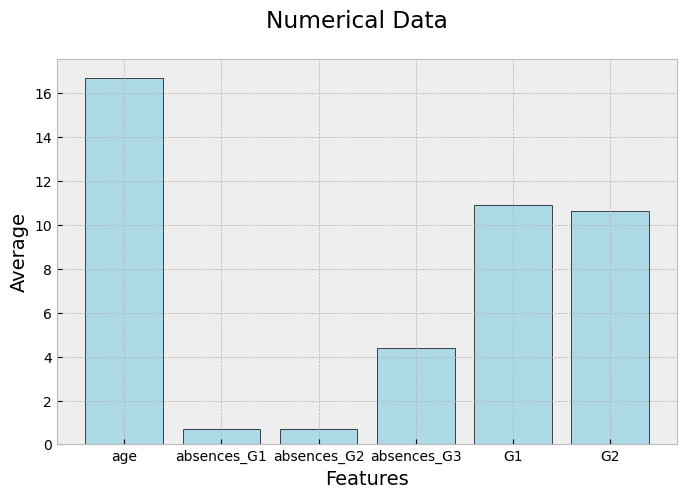

In [8]:
import matplotlib.pyplot as plt

# Numeric columns for visual 
feature_numeric_columns =  X_train[['age','absences_G1','absences_G2','absences_G3','G1','G2']].copy()

# Coding for font, axes, legent, etc.
plt.figure(figsize=(8, 5))
plt.style.use('bmh')
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Average, barchart of numerical data
plt.bar(feature_numeric_columns.columns, feature_numeric_columns.mean(), color='lightblue', edgecolor='black')
plt.suptitle('Numerical Data', x=0.5, y=0.98, ha='center')
plt.xlabel('Features')
plt.ylabel('Average')
plt.show()

**Insights and observations pertaining to the histograms below.**

`Age:`
- Shows a cut-off around 22, with most ages ranging between 15 and 19.
- Skewness: Skewed right.
- Outlier data: Higher ages at the tail end.

`G1:`
- Most students had a grade of 10.00 (C).
- Shows signs of normal distribution.

`G2:`
- Appears to be on a floating scale rather than an integer scale.
- Most students had grades ranging between 9 and 10.00 (F and C).
- Shows signs of normal distribution.

`Absences:`
- Shows that most students attend school regularly.
- Skewness: Right-skewed for all.
- Outlier data towards the lower right side of the tails.

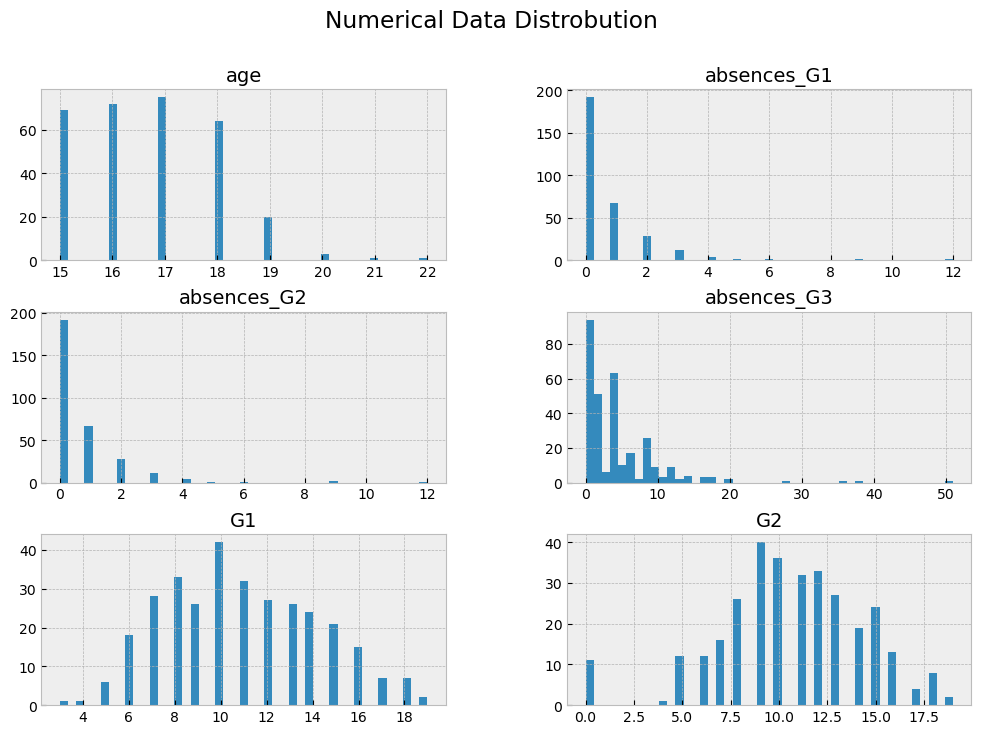

In [9]:
import matplotlib.pyplot as plt

# define font sizes
plt.style.use('bmh')
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# plots histograms of numerical data
feature_numeric_columns.hist(bins=45, figsize=(12, 8))
plt.style.use('bmh')
plt.suptitle('Numerical Data Distrobution', x=0.5, y=0.98, ha='center')
plt.show()

**Target's Average Performance Grade** 

In [10]:
print('Target Performance Grade Average:', y_train.mean().round(0))

Target Performance Grade Average: 10.0


The histogram and bar chart below show visual representations of the spread of data pertaining to performance grades of the target and the percentage of where each performance grade falls.
The data appears to be almost evenly distributed with a few outliers. One notable outlier is the value of `0.0`, indicating an F performance grade. 
This outlier indicates that some students are not performing well and may continue to struggle moving forward.
Approximately `10%` of the performance grades are Fs, while `14%` are Cs which is what most students received prior. 
As stated earlier, the average grade for past performances was a C.

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=y_train, bins=50) # sns histogram
plt.title('Target Performance')
plt.xlabel('Performance Grade')
plt.ylabel('Count')
plt.show()

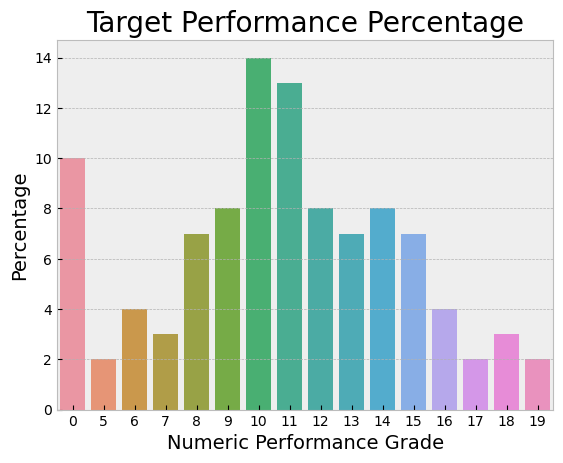

In [11]:
# Dataframe created for target values
target_percentage = pd.DataFrame(data=y_train.value_counts(normalize=True).round(2) * 100) # Perentage of each performance grade

 # Reset index for visual
target_percentage = target_percentage.reset_index()

# Bar plot showing percentages of each performance grade for the target
sns.barplot(data=target_percentage, y='proportion', x='G3')
plt.title('Target Performance Percentage')
plt.xlabel('Numeric Performance Grade')
plt.ylabel('Percentage')
plt.show()

The information below shows that there are missing values for absences and age, which will be addressed during the preparation phase.
In the training set, the categorical attributes are interpreted as integer data types based on the attribute list provided. 
However, the corresponding integer values representing the categorical data will be encoded accordingly.

In [12]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 150 to 4
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       316 non-null    object 
 1   sex          316 non-null    object 
 2   age          305 non-null    float64
 3   address      316 non-null    object 
 4   famsize      316 non-null    object 
 5   Pstatus      316 non-null    object 
 6   Medu         316 non-null    int64  
 7   Fedu         316 non-null    int64  
 8   Mjob         316 non-null    object 
 9   Fjob         316 non-null    object 
 10  reason       316 non-null    object 
 11  guardian     316 non-null    object 
 12  traveltime   316 non-null    int64  
 13  studytime    316 non-null    int64  
 14  failures     316 non-null    int64  
 15  schoolsup    316 non-null    object 
 16  famsup       316 non-null    object 
 17  paid         316 non-null    object 
 18  activities   316 non-null    object 
 19  nursery      

**Categorical Features**

Some categorical features have `ordinal` meaning, while others are `binary` (e.g., yes or no) or `nominal` (with no meaningful order). 
The data below provides a detailed count of each value type within its corresponding category.

`Ordinal`

In [13]:
# Ordinal 
# Selecing all cat columns in training set that are ordinal
feature_ordinal_columns = X_train[['Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health']].copy()

# Function created to list all categories in columns
for column in feature_ordinal_columns.columns:
    print(f"Value counts for column '{column}':")
    print(feature_ordinal_columns[column].value_counts())
    print("\n")

Value counts for column 'Medu':
Medu
4    99
2    85
3    78
1    52
0     2
Name: count, dtype: int64


Value counts for column 'Fedu':
Fedu
2    94
3    80
4    72
1    69
0     1
Name: count, dtype: int64


Value counts for column 'traveltime':
traveltime
1    203
2     89
3     18
4      6
Name: count, dtype: int64


Value counts for column 'studytime':
studytime
2    152
1     89
3     55
4     20
Name: count, dtype: int64


Value counts for column 'famrel':
famrel
4    166
5     79
3     51
2     16
1      4
Name: count, dtype: int64


Value counts for column 'freetime':
freetime
3    126
4     90
2     51
5     35
1     14
Name: count, dtype: int64


Value counts for column 'goout':
goout
3    105
2     76
4     73
5     43
1     19
Name: count, dtype: int64


Value counts for column 'Dalc':
Dalc
1    223
2     58
3     22
5      8
4      5
Name: count, dtype: int64


Value counts for column 'Walc':
Walc
1    121
2     69
3     62
4     43
5     21
Name: count, dtype: int64


Va

**`Binomial` and `Nominal Data`**

In [14]:
# Selecing all cat columns in training set that are nominal
feature_cat_columns = X_train[['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic',
                              'Mjob','Fjob','reason','guardian','failures']].copy()

# Function created for showing cat counts
for column in feature_cat_columns.columns:
    print(f"Value counts for column '{column}':")
    print(feature_cat_columns[column].value_counts())
    print("\n")

Value counts for column 'school':
school
GP    279
MS     37
Name: count, dtype: int64


Value counts for column 'sex':
sex
F    170
M    146
Name: count, dtype: int64


Value counts for column 'address':
address
U    241
R     75
Name: count, dtype: int64


Value counts for column 'famsize':
famsize
GT3    218
LE3     98
Name: count, dtype: int64


Value counts for column 'Pstatus':
Pstatus
T    280
A     36
Name: count, dtype: int64


Value counts for column 'schoolsup':
schoolsup
no     272
yes     44
Name: count, dtype: int64


Value counts for column 'famsup':
famsup
yes    195
no     121
Name: count, dtype: int64


Value counts for column 'paid':
paid
no     176
yes    140
Name: count, dtype: int64


Value counts for column 'activities':
activities
yes    159
no     157
Name: count, dtype: int64


Value counts for column 'nursery':
nursery
yes    252
no      64
Name: count, dtype: int64


Value counts for column 'higher':
higher
yes    299
no      17
Name: count, dtype: int64


V

**Notable Categorical Visuals and Statistics**

The additional charts below provide insights into study time and parental education level. As shown, approximately `27%` of students have a study time of less than two hours. 
This information can be beneficial for many reasons. For instance, students who have less than 2 hours of study time can be examined to determine if there are any 
students in this category who need attention for improvement.
Regarding parental education level, the mother's education level is shown to be superior, with over `30%` having a higher level of education, while for the father category, it is slightly over `20%`.

In general each category feture provides valuable information that can translate into a student's performance. For example, a student may perform better in school if 
they have additional resources (parents with higher education) to assist in improving their child's performance grade. A student may perform poorly if he or she parents fall in a category of having no education at all.

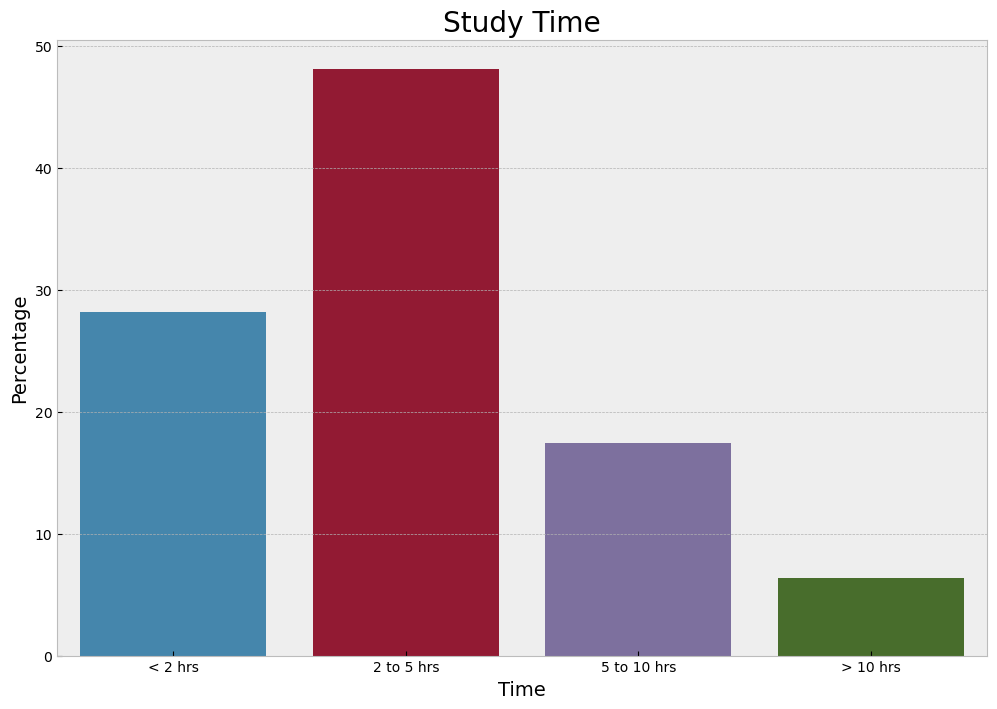

In [15]:
# Index for categories
studytime_index_map = {1:'< 2 hrs', 2:'2 to 5 hrs', 3:'5 to 10 hrs',
                       4:'> 10 hrs'}
# Percentage calculation
studytime_percentages = X_train['studytime'].value_counts(normalize=True).sort_index(ascending=True) *100

# index map
studytime_percentages.index = studytime_percentages.index.map(studytime_index_map)

# Bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=studytime_percentages.index, y=studytime_percentages.values);
plt.title("Study Time")
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.show()

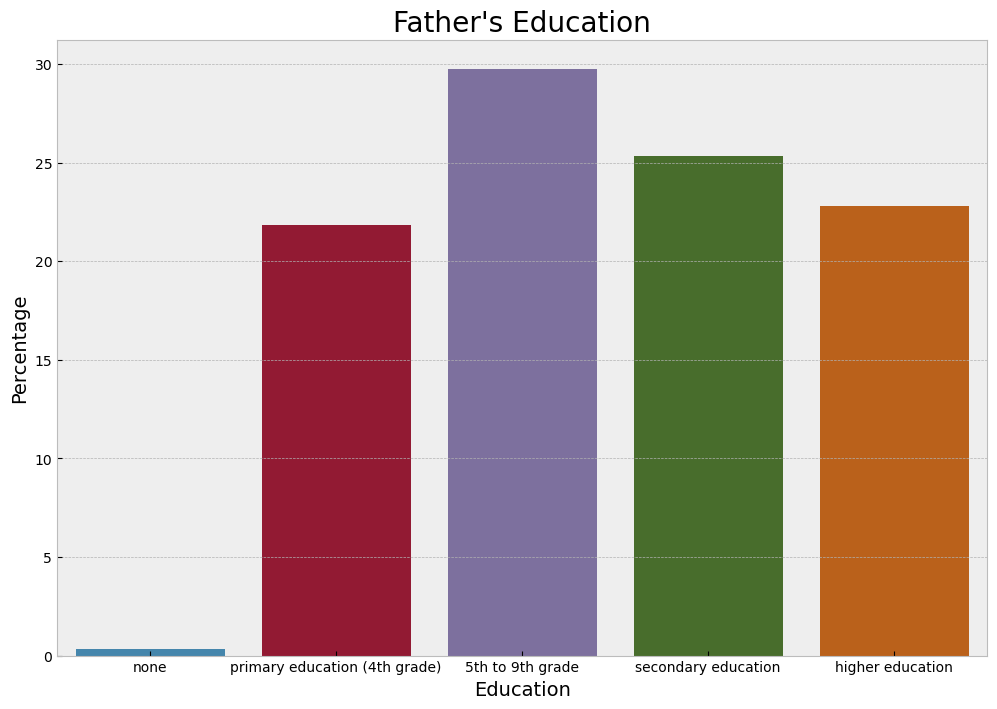

In [16]:
# Index map
Fedu_index_map = {0:'none',1:'primary education (4th grade)',2:'5th to 9th grade',
                  3:'secondary education',4:'higher education'}

# Calculation for percentages
Fedu_percentages = X_train['Fedu'].value_counts(normalize=True).sort_index(ascending=True) * 100

# Index mapping 
Fedu_percentages.index = Fedu_percentages.index.map(Fedu_index_map)

# Bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=Fedu_percentages.index, y=Fedu_percentages.values);
plt.title("Father's Education")
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.show()

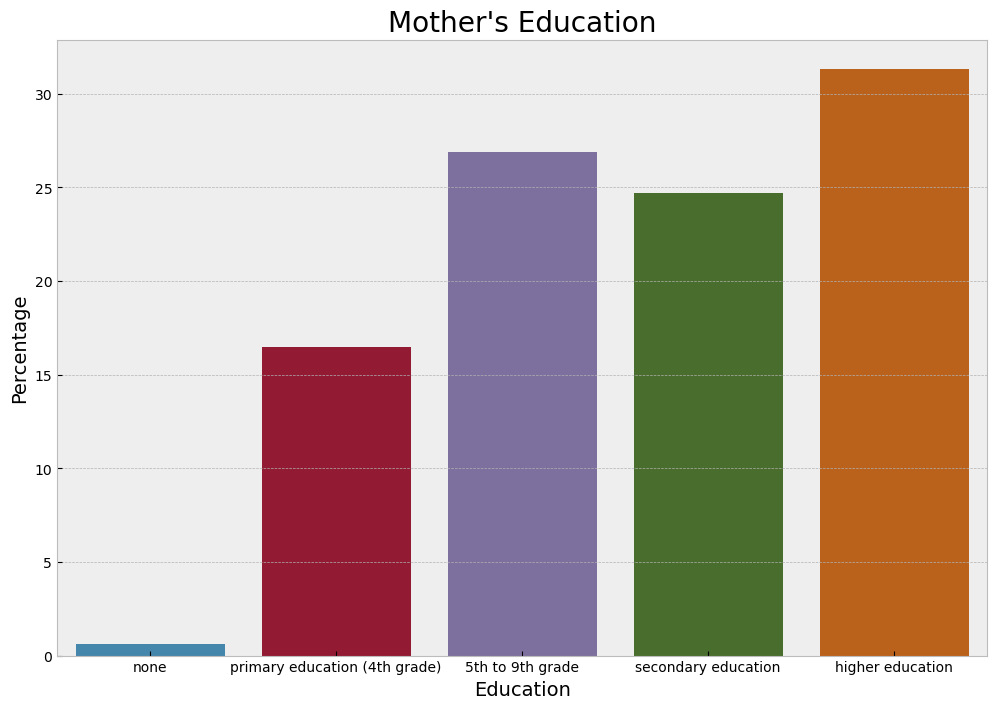

In [17]:
# index
Medu_index_map = {0:'none',1:'primary education (4th grade)',2:'5th to 9th grade',
                  3:'secondary education',4:'higher education'}

# Percentage calculation
Medu_percentages = X_train['Medu'].value_counts(normalize=True).sort_index(ascending=True) * 100

# Index mapping
Medu_percentages.index = Medu_percentages.index.map(Medu_index_map)

# Bar chart 
plt.figure(figsize=(12, 8))
sns.barplot(x=Medu_percentages.index, y=Medu_percentages.values);
plt.title("Mother's Education")
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.show()

## Correlations

**Numerical Features**

The correlation matrix below displays the numerical correlation between each numerical attribute in the training data. The target variable is also listed to examine any potential linear relationships between the features and the target.
A positive correlation indicates that as one variable increases, the other variable tends to increase as well.
Correlations provide insights pertaining to their relationship stength and the direction they move in.

There is very little correlation between the features and the target variable. However, G1 and G2 exhibit a strong positive correlation, while absences show minimal correlation, and age resulting in having a negative correlation. In fact, a negative correlation indicates that as one variable increases, the other variable tends to decrease. In other words, when one variable goes up, the other tends to go down.
However, keep in mind that correlation does not imply causation.

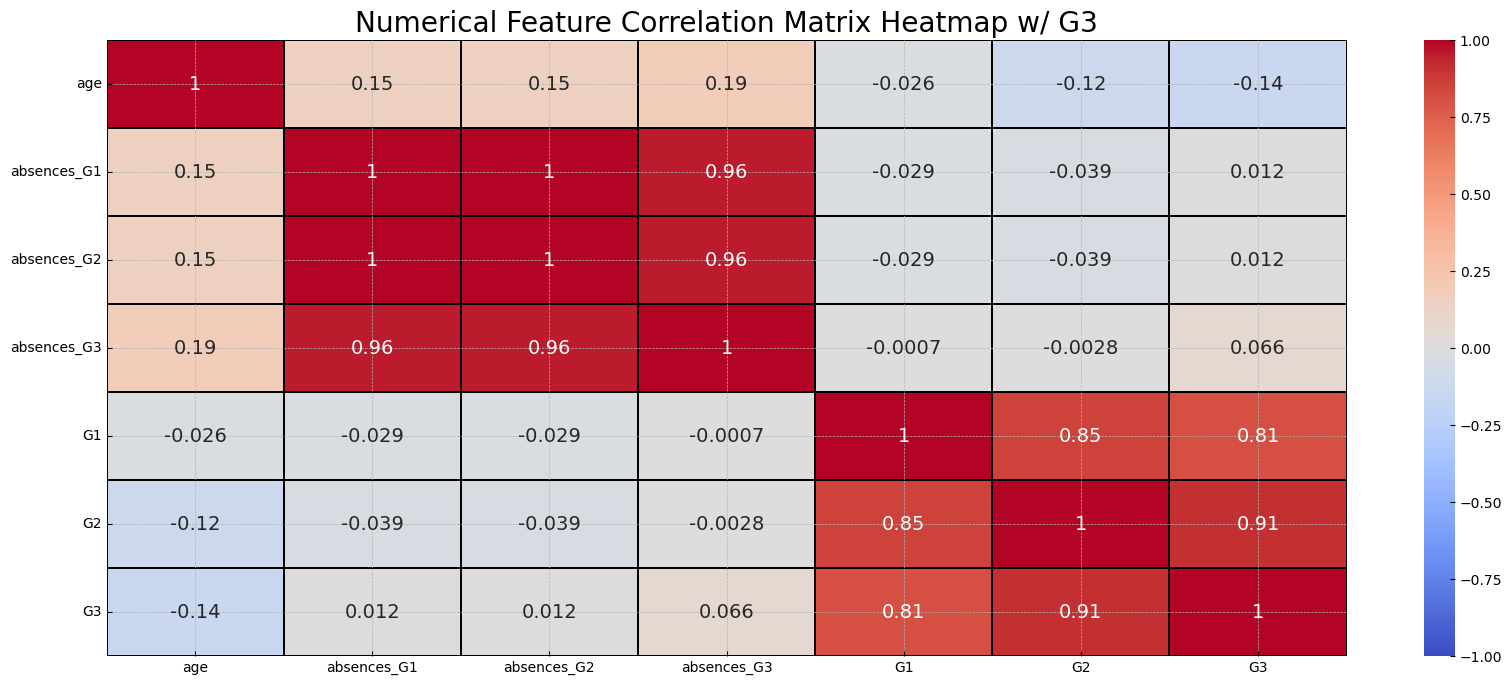

In [18]:
import seaborn as sns

# Numeric calumns
feature_numeric_columns =  X_train[['age','absences_G1','absences_G2','absences_G3','G1','G2']].copy()

# Combine features and target to dataframe
numerical_corr_df = pd.concat([feature_numeric_columns, y_train], axis=1)

# Correlation matrix 
feture_numeric_corr = numerical_corr_df.corr().round(4)

# Plotting the heatmap for the correlation matrix
plt.style.use('bmh')
plt.figure(figsize=(20, 8))
sns.heatmap(feture_numeric_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linecolor='black', linewidth=0.01)
plt.title('Numerical Feature Correlation Matrix Heatmap w/ G3')
plt.show()

The scatter matrix below provides insights into visually viewing linear relationships, as well as how the data is distributed. Viewing the correlations is important for several reasons. 
This helps with interpreting how the data moves in a linear relationship and the direction both X and Y go in, as mentioned prior. Based on the scatter matrix below and as seen above, 
G1 and G2 have a strong positive correlation. There are also very minimal correlations between performance grades (G1 and G2) and absences. 
As for the age of the student, there is very minimal correlation with absences and performance grades.

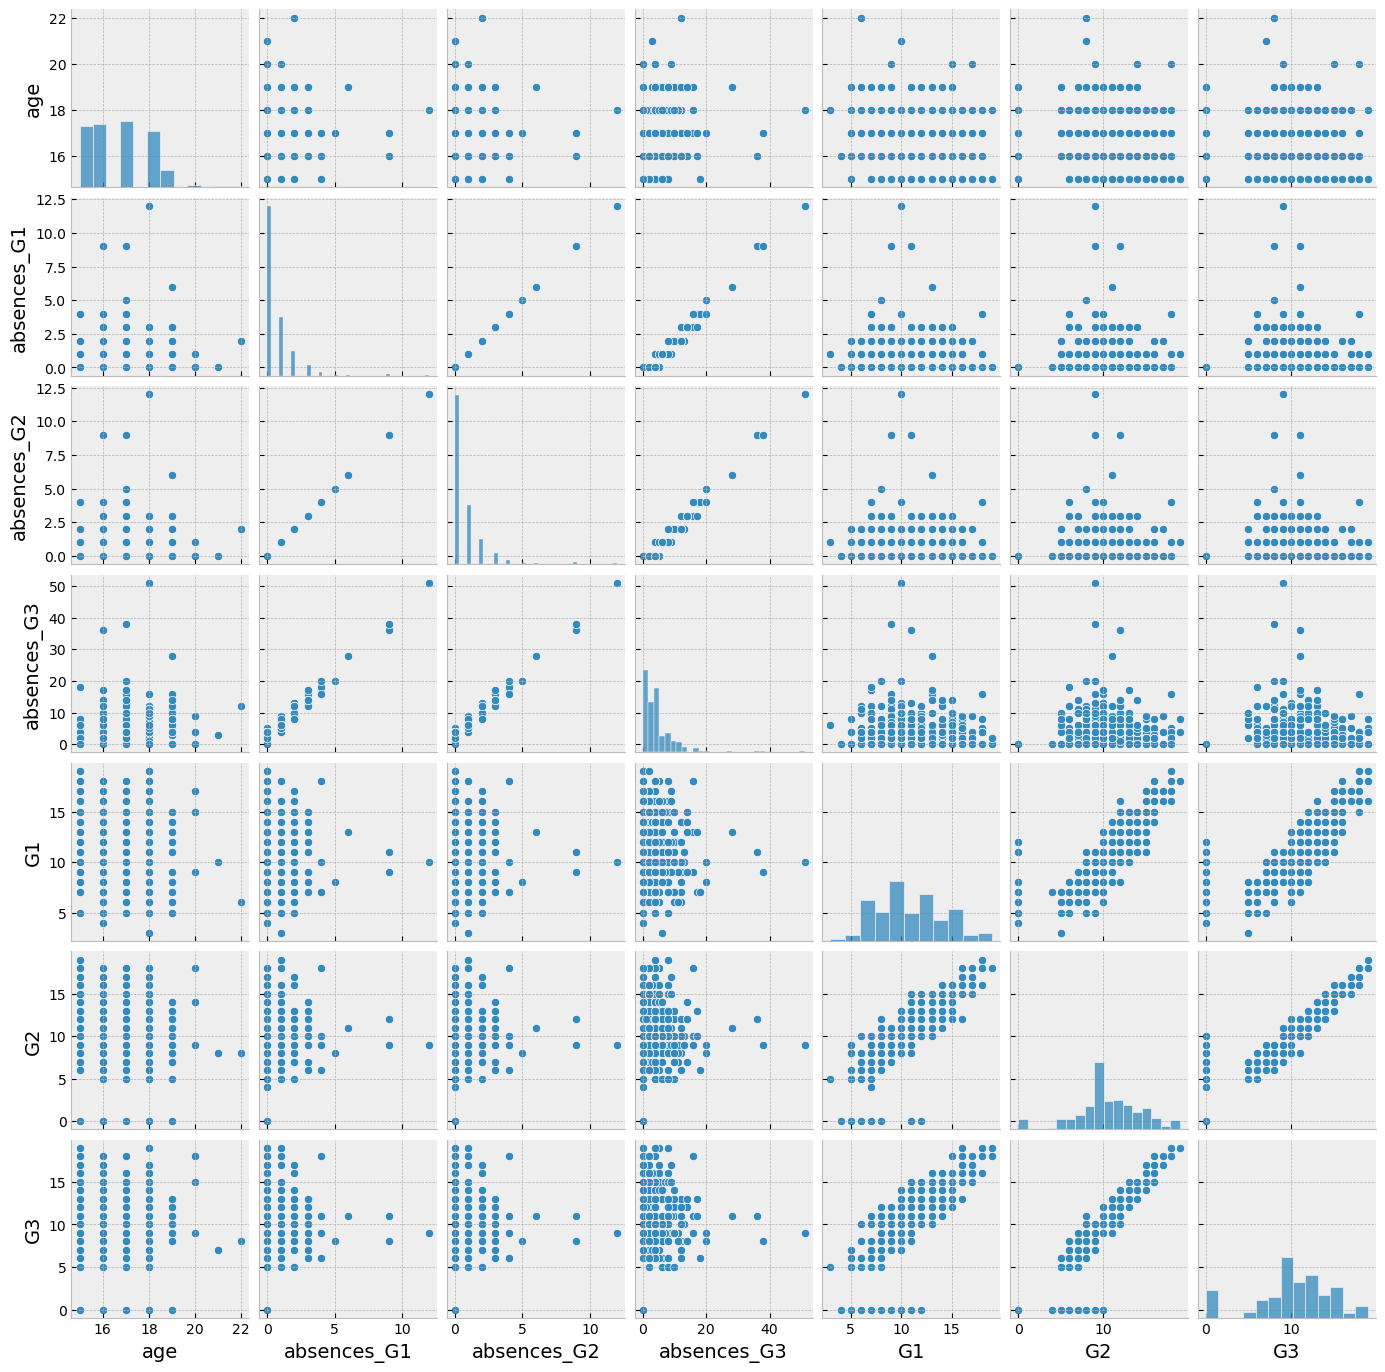

In [19]:
from pandas.plotting import scatter_matrix

# Scatter Matrix
sca_matrix_df = pd.concat([X_train, y_train], axis=1)

attributes = ['age','absences_G1','absences_G2','absences_G3','G1','G2','G3']

# plots scatterplots and histograms when variable is compared against itself
sns.pairplot(sca_matrix_df[attributes], height=2.0)
plt.show()

**Categorical Features**

**Ordinal**

Categorical features can be displayed in various ways, with different data types. 
For instance, the categorical data in the training set consists of ordinal data, where the order of the values are meaningful; binary data, where there are only two outcomes such as yes or no; 
and nominal data, where there is no ordinal meaning. In examining the ordinal correlation matrix, it becomes apparent that certain features exhibit a minimal positive correlation. 
For example, there is a slight positive correlation observed between mother's and father's education levels with the target. While this correlation is minimal, it suggests a potential trend worth 
investigating further in understanding the relationship between the target and parental education.

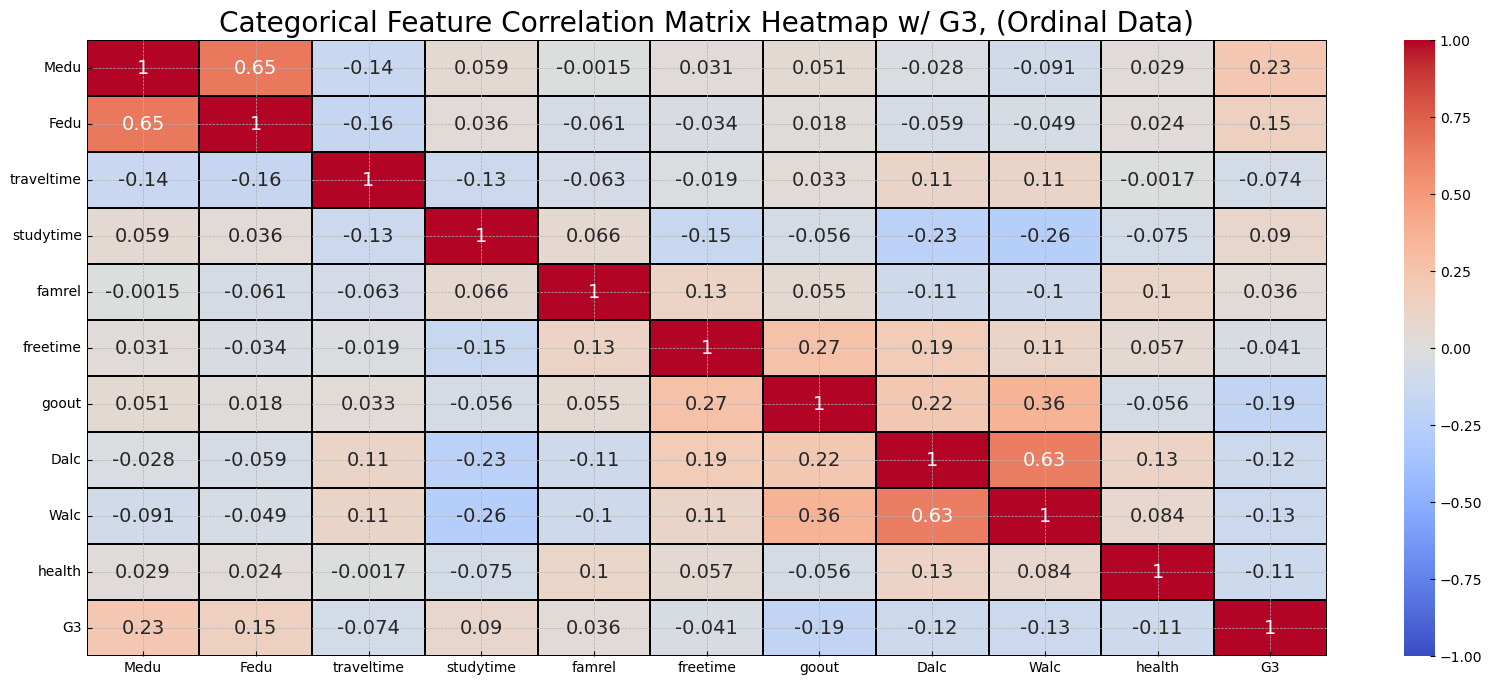

In [20]:
# Ordinal data 
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns

# Selecing all cat columns in training set that are ordinal
feature_ordinal_columns = X_train[['Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health']].copy()

# Combine ordinal categorical features with target 
feture_ordinal_cat_corr_df = pd.concat([feature_ordinal_columns, y_train], axis=1)

# Initialize OridinalEncoder for ordinal categories
encoder_for_ordinal_cat = OrdinalEncoder()

# Fit and transform the ordinal categorical features to columns 
encoded_ordinal_cat = encoder_for_ordinal_cat.fit_transform(feature_ordinal_columns)

# Ordinal features to DataFrame, encoded
encoded_ordinal_cat_df = pd.DataFrame(encoded_ordinal_cat, columns=encoder_for_ordinal_cat.get_feature_names_out(feature_ordinal_columns.columns))

# Combine encoded ordinal categorical features df with the target variable
cat_ordinal_df = pd.concat([encoded_ordinal_cat_df, y_train.reset_index(drop=True)], axis=1)

# Correlation matrix 
feature_ordinal_cat_corr = cat_ordinal_df.corr(method='spearman').round(4) # spearman rank

# Plotting the heatmap for the correlation matrix
plt.style.use('bmh')
plt.figure(figsize=(20, 8))
sns.heatmap(feature_ordinal_cat_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linecolor='black', linewidth=0.01)
plt.title('Categorical Feature Correlation Matrix Heatmap w/ G3, (Ordinal Data)')
plt.show()

**Binomial and Nominal Data**

The correlation matrix for the non-ordinal data provides insights into the relationships with other features and the target variable. 
Some features consist of binary responses where there are only two possible outcomes. However, to avoid multicollinearity, only one binomial
response was kept. 
Multicollinearity occurs when predictor variables are highly correlated with each other, which can affect the stability and interpretability of regression models.

The matrix below pertaining to the binary and nominal data provides correlations for each possible outcome. For example, under the 'mother job' (Mjob) category, 
there are correlations shown for each job type in that category. This information can be used to dig deeper to see how specific subcategories in a particular groups exhibit a 
linear relationship with the target variable.

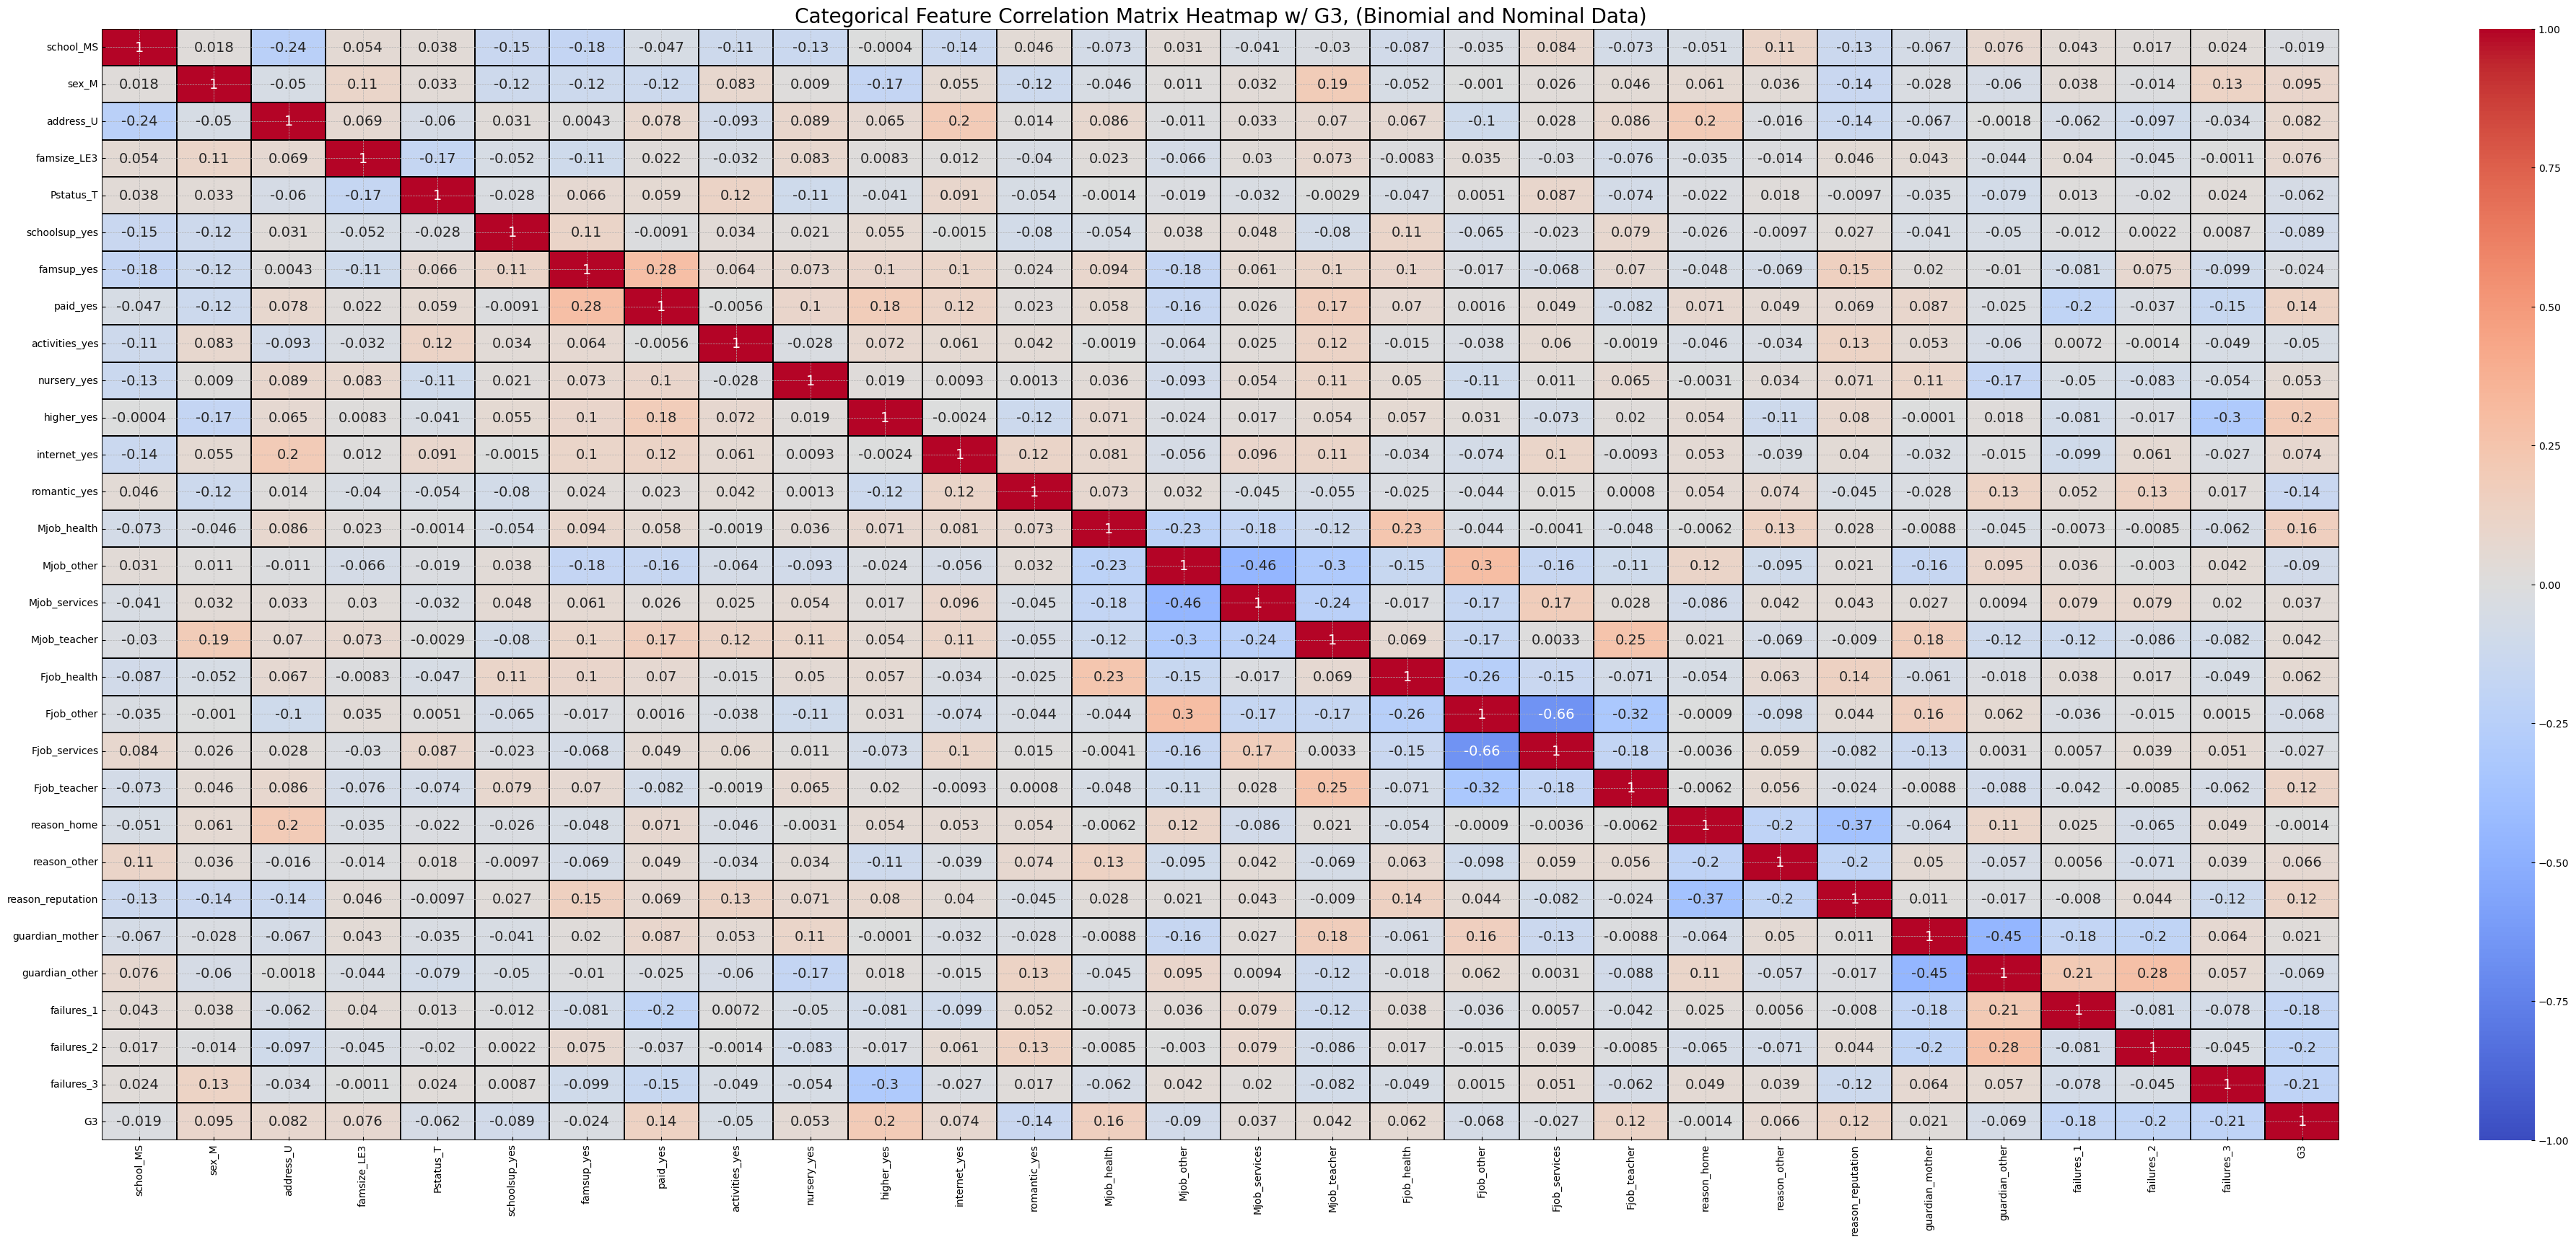

In [21]:
#Bino data & Nominal
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

# Selecing all cat columns in training set that are nominal/bino
feature_cat_columns = X_train[['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic',
                              'Mjob','Fjob','reason','guardian','failures']].copy()


# Combine nominal/bino categorical features aginst target 
cat_corr_df = pd.concat([feature_cat_columns, y_train], axis=1)

# Initialize OneHotEncoder for nominal/bino categories. 
encoder_for_cat = OneHotEncoder(drop='first',sparse_output=False) # Note, avoding multicollinearity from producing redundent data and overfitting

# Fit and transform nominal/bino categorical features for columns
encoded_cat = encoder_for_cat.fit_transform(feature_cat_columns)

# Combine nominal/bino categorical features to DataFrame with econded 
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder_for_cat.get_feature_names_out(feature_cat_columns.columns))

# Combine encoded nominal/bino categorical features with target variable, make df
cat_df = pd.concat([encoded_cat_df, y_train.reset_index(drop=True)], axis=1)

# Nominal/bino Correlation Matrix 
feature_cat_corr = cat_df.corr().round(4)

# Plotting the heatmap for the correlation matrix
plt.style.use('bmh')
plt.figure(figsize=(50, 20))
sns.heatmap(feature_cat_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linecolor='black', linewidth=0.01, linewidths=0)
plt.title('Categorical Feature Correlation Matrix Heatmap w/ G3, (Binomial and Nominal Data)')
plt.show()

# Prepare the Data

## Feature Selection

Below are the correlations with G3 (Target). This is where features that may have the most impact are selected for use. 
The features selected are based on their correlation coefficient with performance grades G3. 
As mentioned earlier, G1 and G2 show a strong positive correlation with G3, indicating that as one variable increases, the other tends to increase as well. 
Although absences and age show little correlation with G3, these features will still be retained. This decision aligns with the nature of the data and the project requirements.
No features will be removed from the numerical section.

In [22]:
print(feture_numeric_corr.G3.sort_values(ascending=False))

G3             1.0000
G2             0.9087
G1             0.8064
absences_G3    0.0656
absences_G1    0.0124
absences_G2    0.0124
age           -0.1411
Name: G3, dtype: float64


Below, are the odinal features and their correlation coefficients with G3 (target).

Features to be selected:
- Medu (Mother's education)
- Fedu (Father's education)
- studytime
- health
- Dalc (workday alcohol consumption)
- Walc (weekend alcohol consumption)
- goout (going out)
        
Features to be removed:
- famrel
- freetime
- traveltime

In [23]:
print(feature_ordinal_cat_corr.G3.sort_values(ascending=False))

G3            1.0000
Medu          0.2339
Fedu          0.1506
studytime     0.0904
famrel        0.0362
freetime     -0.0413
traveltime   -0.0743
health       -0.1131
Dalc         -0.1219
Walc         -0.1292
goout        -0.1918
Name: G3, dtype: float64


Below, are the bino and nominal categorical features and their correlation coefficients with G3 (target).

Features to be selected:
- failures     
- higher
- Mjob
- paid
- Fjob
- reason
- romantic       

Features to be remove:
- sex
- address
- famsize
- internet
- nursery
- guardian
- school
- famsup
- activities
- Pstatus      
- schoolsup

## Removed Columns

In [24]:
# Function created for deleted columns that arent needed 
feature_drop = ['famrel','freetime', 'traveltime', 'sex','address','famsize',
                'internet','nursery','guardian','school','famsup','activities','Pstatus','schoolsup']

def delete_col(x, col_names):
    for col in col_names:
        if col in x.columns:
            del x[col]

delete_col(X_train, feature_drop)

## Transformer

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

# Assign columns to indexes, numeric indexes that will be passed through column transfer (num_attributes)
absences_G1, absences_G2, absences_G3, age, G1, G2 = 0,1,2,3,4,5

# Class creation for Total abses
class TotalAbsences(BaseEstimator, TransformerMixin):
    def __init__(self, create_new_column=True): # Parameter set to True to excute calculation and drop absences and G1/G2
        self.create_new_column = create_new_column
        
    def fit(self, X, y=None):
        return self
    
    # Transforming data, converting to dataframe, accepts array type objects input
    def transform(self, X):
        if not isinstance(X, pd.DataFrame): # dataframe and ID columns for dataframe.
            X = pd.DataFrame(X, columns=['absences_G1', 'absences_G2', 'absences_G3','age','G1','G2'])  
        
        # Calculation for total absences 
        total_absences = X.iloc[:, absences_G1] + X.iloc[:, absences_G2] + X.iloc[:, absences_G3]
        
        # if set to True, total absences will be exicuted, G1 and G2 will be removed
        if self.create_new_column:
            X_transformed = X.drop(['absences_G1', 'absences_G2', 'absences_G3','G1','G2'], axis=1)
            X_transformed['total_absences'] = total_absences
        else:
        # if set to False, df will calculate total absences and remove abssences columns
            X_transformed = X.drop(['absences_G1', 'absences_G2', 'absences_G3'], axis=1)
            X_transformed['total_absences'] = total_absences
        
        return X_transformed

## Pipelines | Missing Valuse | Column Transfer | Feature Scaling | Categorical Data

In [26]:
# Columns for processing to pass through column transfer and pipelines
num_attributes = X_train[['age','absences_G3','absences_G1', 'absences_G2','G1','G2']].columns.to_list()
cat_attributes = X_train[['Mjob', 'paid', 'Fjob', 'reason', 'romantic']].columns.to_list()
ord_cat_attributes = X_train[['Medu', 'Fedu', 'studytime', 'health', 'Dalc', 'Walc', 'goout','failures', 'higher']].columns.tolist()

**Total Absences | G1 and G2 Included**

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Pipeline created using mean for num data types
# Pipeline includes TotalAbsences transformer.
# Numerical valuses will be scaled
num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    TotalAbsences(create_new_column=False), # Note, set to false
    StandardScaler())

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Pipeline created using most_freq strategy. 
# Cat objects are non-ordinal, OneHotEncoder method used.
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), # replace missing using the most frequent value along each column.
    OneHotEncoder(drop='first', sparse_output=False))

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Pipeline created using most_freq stat with imputer. 
# Valuse have meaningful order OrdinalEncoder method used.
ord_cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder())

In [30]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_attributes), # applying transformation to numerical values.
        ("cat", cat_pipeline, cat_attributes),
        ("ord", ord_cat_pipeline, ord_cat_attributes)# applying transformation to cat attributes
    ])

X_train_prepared_A = preprocessing.fit_transform(X_train) # fiting and transforming data to df. 

## Transformation Output: X_train_prepared_A

In [31]:
# G1 and G2 included
print(pd.DataFrame(X_train_prepared_A).shape)

(316, 26)


**Total Absences | G1, G2 Excluded**

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Pipeline created using mean for num data types
# Pipeline includes TotalAbsences transformer.
# Numerical valuses will be scaled
num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    TotalAbsences(create_new_column=True), # Note, set to true for this portion 
    StandardScaler())

In [33]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_attributes), # applying transformation to numerical values.
        ("cat", cat_pipeline, cat_attributes), # applying transformation to non-ordinal values
        ("ord", ord_cat_pipeline, ord_cat_attributes)# applying transformation to ordinal values 
    ])

X_train_prepared_B = preprocessing.fit_transform(X_train) # fiting and transforming data to df. 

## Transformation Output: X_train_prepared_B

In [34]:
# Removed G1 and G2
print(pd.DataFrame(X_train_prepared_B).shape)

(316, 24)


## Shortlist Promising Models

## Linear Regression Models

**Model A**

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg_model_A = LinearRegression() # Regression model

# Fiting prepared data for df A
lin_reg_model_A.fit(X_train_prepared_A, y_train) 

LinearRegression()

In [36]:
# Training error for Linear Model A
from sklearn.metrics import mean_squared_error

# Predictions
lin_reg_predictions_A = lin_reg_model_A.predict(X_train_prepared_A)

# RMSE
lin_reg_rmse_Model_A = mean_squared_error(y_train, lin_reg_predictions_A,
                              squared=False)

print("Model A RMSE:", lin_reg_rmse_Model_A.round(2))

Model A RMSE: 1.78


**Cross Validation**

In [37]:
from sklearn.model_selection import cross_val_score

lin_reg_model_A_CV = -cross_val_score(lin_reg_model_A, X_train_prepared_A, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [38]:
print("RMSE", pd.Series(lin_reg_model_A_CV).describe())
print("---------------------------------------------")
print("Average Performance Grade:", y_train.mean().round())

RMSE count    10.000000
mean      1.911011
std       0.481400
min       1.164261
25%       1.774838
50%       1.832014
75%       2.168574
max       2.721671
dtype: float64
---------------------------------------------
Average Performance Grade: 10.0


**Model B**

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg_model_B = LinearRegression() # Regression Model

lin_reg_model_B.fit(X_train_prepared_B, y_train) # Fiting model to df B

LinearRegression()

In [40]:
# Training error for Linear Model B
from sklearn.metrics import mean_squared_error

# Predictions
lin_reg_predictions_B = lin_reg_model_B.predict(X_train_prepared_B)

# RMSE
lin_reg_rmse_Model_B = mean_squared_error(y_train, lin_reg_predictions_B,
                              squared=False)

print("Model B RMSE (Error):", lin_reg_rmse_Model_B.round(2))

Model B RMSE (Error): 3.93


**Cross Validation**

In [41]:
from sklearn.model_selection import cross_val_score

lin_reg_model_B_CV = -cross_val_score(lin_reg_model_B, X_train_prepared_B, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [42]:
print("RMSE", pd.Series(lin_reg_model_B_CV).describe())
print("---------------------------------------------")
print("Average Performance Grade:", y_train.mean().round())

RMSE count    10.000000
mean      4.285178
std       0.532061
min       3.628735
25%       3.961377
50%       4.167043
75%       4.540337
max       5.341846
dtype: float64
---------------------------------------------
Average Performance Grade: 10.0


## Random Forest Regressor Models

**Model A**

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor model
forest_reg_model_A = RandomForestRegressor(random_state=42) 

# fit the model to df A
forest_reg_model_A.fit(X_train_prepared_A, y_train)

RandomForestRegressor(random_state=42)

In [44]:
# Training error for RandomForest Model A
from sklearn.metrics import mean_squared_error

# Predictions
randforest_predictions_A = forest_reg_model_A.predict(X_train_prepared_A)

# RMSE
randforest_rmse_Model_A = mean_squared_error(y_train, randforest_predictions_A,
                              squared=False)

print("Random Forest Model A RMSE (Error):", randforest_rmse_Model_A.round(2))

Random Forest Model A RMSE (Error): 0.67


**Cross Validation**

In [45]:
from sklearn.model_selection import cross_val_score

Ran_forest_reg_model_A_CV = -cross_val_score(forest_reg_model_A, X_train_prepared_A, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [46]:
print("RMSE", pd.Series(Ran_forest_reg_model_A_CV).describe())
print("---------------------------------------------")
print("Average", y_train.mean().round())

RMSE count    10.000000
mean      1.726830
std       0.575237
min       0.832970
25%       1.450795
50%       1.664688
75%       2.221797
max       2.553977
dtype: float64
---------------------------------------------
Average 10.0


**Model B**

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor model
forest_reg_model_B = RandomForestRegressor(random_state=42) 

# fit the model df prepared data B
forest_reg_model_B.fit(X_train_prepared_B, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# Training error for Random Forest Model B
from sklearn.metrics import mean_squared_error

randforest_predictions_B = forest_reg_model_B.predict(X_train_prepared_B)

randforest_rmse_Model_B = mean_squared_error(y_train, randforest_predictions_B,
                              squared=False)

print("Random Forest Model B RMSE (Error):", randforest_rmse_Model_B.round(2))

Random Forest Model B RMSE (Error): 1.6


**Cross Validation**

In [49]:
from sklearn.model_selection import cross_val_score

Ran_forest_reg_model_B_CV = -cross_val_score(forest_reg_model_B, X_train_prepared_B, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [50]:
print("RMSE", pd.Series(Ran_forest_reg_model_B_CV).describe())
print("---------------------------------------------")
print("Average", y_train.mean().round())

RMSE count    10.000000
mean      4.111024
std       0.749465
min       3.025962
25%       3.847745
50%       3.983096
75%       4.380674
max       5.652501
dtype: float64
---------------------------------------------
Average 10.0


## Decision Tree Regressor Models

**Model A**

In [51]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree model 
dec_tree_reg_model_A = DecisionTreeRegressor(random_state=42)

# Fit model to prepared df A
dec_tree_reg_model_A.fit(X_train_prepared_A, y_train)

DecisionTreeRegressor(random_state=42)

In [52]:
# Training error for Descision Tree Model A
from sklearn.metrics import mean_squared_error

# Predictions
dec_tree_predictions_A = dec_tree_reg_model_A.predict(X_train_prepared_A)

# RMSE
dec_tree_rmse_Model_A = mean_squared_error(y_train, dec_tree_predictions_A,
                              squared=False)

print("Decision Tree Model A RMSE (Error):", dec_tree_rmse_Model_A.round(2))

Decision Tree Model A RMSE (Error): 0.0


**Cross Validation**

In [53]:
from sklearn.model_selection import cross_val_score

dec_tree_model_A_CV = -cross_val_score(dec_tree_reg_model_A, X_train_prepared_A, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [54]:
print("RMSE", pd.Series(dec_tree_model_A_CV).describe())
print("---------------------------------------------")
print("Average", y_train.mean().round())

RMSE count    10.000000
mean      2.269848
std       0.930014
min       0.823055
25%       1.598306
50%       2.520772
75%       2.676024
max       3.491060
dtype: float64
---------------------------------------------
Average 10.0


**Model B**

In [55]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Model B
dec_tree_reg_model_B = DecisionTreeRegressor(random_state=42)

# Fit model to prepared data B
dec_tree_reg_model_B.fit(X_train_prepared_B, y_train)

DecisionTreeRegressor(random_state=42)

In [56]:
# Training error for Random Forest Model B
from sklearn.metrics import mean_squared_error

# Predcitions
dec_tree_predictions_B = dec_tree_reg_model_B.predict(X_train_prepared_B)

# RMSE
dec_tree_rmse_Model_B = mean_squared_error(y_train, dec_tree_predictions_B,
                              squared=False)

print("Decision Tree Model B RMSE (Error):", dec_tree_rmse_Model_B.round(2))

Decision Tree Model B RMSE (Error): 0.0


**Cross Validation**

In [57]:
from sklearn.model_selection import cross_val_score

dec_tree_model_B_CV = -cross_val_score(dec_tree_reg_model_B, X_train_prepared_B, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [58]:
print("RMSE", pd.Series(dec_tree_model_B_CV).describe())
print("---------------------------------------------")
print("Average", y_train.mean().round())

RMSE count    10.000000
mean      5.433634
std       0.602706
min       4.763140
25%       4.992595
50%       5.299829
75%       5.646291
max       6.638111
dtype: float64
---------------------------------------------
Average 10.0


## Fine-Tune the System - Grid Search

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Parameter grid values and hyperparameters to search through
param_grid = {
    'n_estimators': [50, 100, 150],     # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],    # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required to be at a leaf node
}

# Random Forest model
ran_forest = RandomForestRegressor(random_state=42)

# Random Forest Grid seearch
grid_search = GridSearchCV(estimator=ran_forest, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=1)

# Fit grid search to training data selected (A)
grid_search.fit(X_train_prepared_A, y_train)

# Best hyperparameters with best CV score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best CV Score: -3.3128822543497494


## Testing Data

In [60]:
# Function created above to remove features from testing data
delete_col(X_test, feature_drop)

In [61]:
# Re-ran num_pipline to insure create new column is set to false
# This is done b/c the model that was chosen requires columns G1 and G2
# Re-insurance on shape being set correctly
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Pipeline created using mean for num data types
# Pipeline includes TotalAbsences transformer.
# Numerical valuses will be scaled
num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    TotalAbsences(create_new_column=False),# Columns G1 and G2 will be included for this model
    StandardScaler())

In [62]:
from sklearn.compose import ColumnTransformer

# Column transfer for random forest model
# This column transfer is the same as above, however re-ran 
preprocessing_randforest_reg = ColumnTransformer([
        ("num", num_pipeline, num_attributes), 
        ("cat", cat_pipeline, cat_attributes),
        ("ord", ord_cat_pipeline, ord_cat_attributes)
    ])

## Final Model Selection and Performance

In [63]:
from sklearn.metrics import mean_squared_error

# Fit preprocessing on testing data.
# prepprocessing_randforest_reg is the updated column transfer with correct shape for this model 

preprocessing_randforest_reg.fit(X_test) # Upated 

# transform test set features
X_test_prepared = preprocessing_randforest_reg.transform(X_test)

# Transformed Testing data features 
pd.DataFrame(X_test_prepared)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.551388,0.918970,1.047121,-0.215584,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,3.0,0.0,4.0,2.0,4.0,4.0,0.0,1.0
1,-0.551388,0.621435,0.251712,-0.958534,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,4.0,4.0,0.0,4.0,0.0,1.0,1.0,0.0,1.0
2,-0.551388,-1.163778,-0.808834,-0.772796,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0
3,-0.551388,-1.461313,-1.073971,-1.144271,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0
4,-0.551388,0.323899,0.251712,-0.029847,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1.512783,-0.271172,0.516848,1.084577,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,2.0,0.0,4.0,0.0,2.0,3.0,0.0,1.0
75,-0.551388,1.514041,1.842531,-0.587059,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,3.0,3.0,2.0,4.0,0.0,0.0,2.0,0.0,1.0
76,-0.551388,0.323899,0.516848,-0.029847,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,4.0,4.0,1.0,4.0,0.0,1.0,2.0,0.0,1.0
77,0.000000,-1.461313,-1.339107,0.064294,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,4.0,3.0,1.0,0.0,1.0,3.0,4.0,2.0,1.0


In [64]:
# final predictions 
final_predictions = forest_reg_model_A.predict(X_test_prepared)

# Final RMSE value
final_rmse = mean_squared_error(y_test, final_predictions, squared=False).round(2)
print("Final Model RMSE:", final_rmse)

Final Model RMSE: 1.84


# Findings 

**Models**

**Note:** It was determined above to move foward with students data that contain both G1 and G2 performance grades.
Based off the observations above, data set A provided better results.

In [65]:
print("Linear Regression Model A RMSE:", lin_reg_rmse_Model_A.round(2))
print("Random Forest Regressor A Model RMSE:", randforest_rmse_Model_A.round(2))
print("Decision Tree Regressor A RMSE:", dec_tree_rmse_Model_A)

Linear Regression Model A RMSE: 1.78
Random Forest Regressor A Model RMSE: 0.67
Decision Tree Regressor A RMSE: 0.0


In [66]:
print('Linear Regression A CV')
print(pd.Series(lin_reg_model_A_CV).describe())
print('----------------------------------------')
print('Random Forest Regressor A CV')
print(pd.Series(Ran_forest_reg_model_A_CV).describe())
print('----------------------------------------')
print('Decsion Tree Regressor A CV')
print(pd.Series(dec_tree_model_A_CV).describe())

Linear Regression A CV
count    10.000000
mean      1.911011
std       0.481400
min       1.164261
25%       1.774838
50%       1.832014
75%       2.168574
max       2.721671
dtype: float64
----------------------------------------
Random Forest Regressor A CV
count    10.000000
mean      1.726830
std       0.575237
min       0.832970
25%       1.450795
50%       1.664688
75%       2.221797
max       2.553977
dtype: float64
----------------------------------------
Decsion Tree Regressor A CV
count    10.000000
mean      2.269848
std       0.930014
min       0.823055
25%       1.598306
50%       2.520772
75%       2.676024
max       3.491060
dtype: float64


# Conclusion & Evaluation

After evaluating each model using student data to predict performance grades, 
it was concluded that the Random Forest Regressor model is the most suitable for the Portuguese school system. 
The Random Forest model achieved a Root Mean Square Error (RMSE) of `0.67` on the training set and a cross-validation RMSE of `1.73`
across 10 folds (unseen data). This model considers total absences, as well as prior performance grades (G1 and G2).

While the Random Forest model generalizes well with the training data, it shows signs of overfitting as indicated by 
the lower training error compared to the cross-validation RMSE. Despite other models occasionally achieving an RMSE as low as `0.0` (Decision Tree Regressor),
the cross-validation RMSE of the Decision Tree model consistently exceeded those of the Random Forest model. Additionally, the Linear Regression model 
demonstrated a higher RMSE and cross-validation RMSE compared to the Random Forest model. 
The Random Forest Regressor model was chosen for its potential to apply additional techniques to reduce overfitting and improve generalization with unseen data. 
Possible solutions include simplifying the model, regularizing it, or obtaining more training data.

Finally, the test data for the model had a final RMSE score of `1.84`. This measurement indicates that, on average, the distance between the actual and predicted values
is approximately `1.84 units`.

Overall, this model shows promise with a relatively low RMSE. However, further tuning could potentially lower the RMSE even further and enhance the model's predictive accuracy.

# Project Reflection

Overall, all aspects of the project were successfully completed, some came with challenges, however, these
challenges were great for learning purposes and understanding different soultions that can be applied.
Some of these included identifying predictive features and understanding how to structure data to build a machine learning model. 


When working with the custom transformer, some techniques didn't work initially. 
This was primarily due to handling arrays versus working with a dataframe where columns are explicitly named. 
Not being able to directly observe the columns and transformations was a challenge. 
However, once the custom transformer was built using a dataframe format, it became easier to understand how to proceed and further
develop the transformer.

When building pipelines for categorical data, some potential issues arose regarding how the data should be encoded. 
After attempting the One-Hot Encoder function, it became obvious that this technique cannot be used for data that is ordinal. 
Instead, the Ordinal Encoder

One successful aspect of the project was achieving a final RMSE score and analyzing the peformance of each model.
This provided insights into why one model might be superior to another. Moving forward, the chosen model should be optimized 
and tuned further to reduce the final Root Mean Square Error.